In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/totalData.csv')
df

C:\Users\annab\AppData\Local\Temp\ipykernel_2504\404394617.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/totalData.csv')


,Unnamed: 0,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,ListingKey,ListAgentEmail,...,LotSizeDimensions,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict
0,0,MLSListings,MLSListings,"Laminate,Tile",False,NaN,NaN,NaN,1077427852,bholmes@compass.com,...,NaN,7500.0,NaN,False,1.0,Other,94025,NaN,7500.0,NaN
1,1,SouthBay,SouthBay,NaN,True,NaN,NaN,True,1077370123,TeamLyon@LyonStahl.com,...,NaN,7051.0,4.0,True,2.0,Hermosa,90254,0.0,7051.0,NaN
2,2,MLSListings,MLSListings,NaN,False,NaN,NaN,NaN,1077294226,mbarrera0615@gmail.com,...,NaN,7600.0,NaN,False,1.0,Other,93906,NaN,7600.0,NaN
3,3,OutofAreaBoard,OutofAreaBoard,Wood,False,NaN,NaN,False,1077271803,EdanAmar@yahoo.com,...,50x124,6205.0,NaN,False,NaN,NaN,90046,NaN,6205.0,NaN
4,4,SanDiego,SanDiego,NaN,False,NaN,NaN,False,1077148727,doug@dougwestgroup.com,...,NaN,6378.0,NaN,False,3.0,NaN,92057,150.0,6378.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91067,91067,OrangeCounty,OrangeCounty,Vinyl,True,NaN,NaN,False,1038551758,patrick@patrickhourigan.com,...,NaN,3000.0,0.0,False,2.0,Capistrano Unified,92651,0.0,3000.0,NaN
91068,91068,RimOTheWorld,RimOTheWorld,"Carpet,Wood",True,NaN,NaN,False,1038339234,vickycenter@gmail.com,...,NaN,16653.0,1.0,False,2.0,Rim of the World,92352,240.0,16653.0,NaN
91069,91069,Downey,Downey,NaN,True,NaN,NaN,False,1033918791,CarlosCahuas@outlook.com,...,NaN,108900.0,4.0,False,2.0,Barstow Unified,92365,0.0,108900.0,NaN
91070,91070,Mlslistings,Mlslistings,NaN,False,NaN,NaN,NaN,1023270484,assistant@danmoskowitz.com,...,NaN,6336.0,NaN,False,2.0,Other,95121,NaN,6336.0,NaN


In [3]:
# take log of median sale price

df_redfin = pd.read_csv("data/data_median_redfin.csv", dtype={"PostalCode": str}, low_memory=False)

price_cols = ["June", "July", "August", "September", "October", "November", "December", "January"]
df_redfin = df_redfin[["PostalCode"] + price_cols]

df_redfin["PostalCode"] = df_redfin["PostalCode"].astype("category")
df_redfin["MedianSalePrice"] = df_redfin[price_cols].mean(axis=1)

df_redfin = df_redfin[["PostalCode", "MedianSalePrice"]]

df_redfin = df_redfin.drop_duplicates(subset="PostalCode")
df["PostalCode"] = df["PostalCode"].astype("category")
df = df.merge(df_redfin, on="PostalCode", how="left", sort=True)
df["MedianSalePrice"] = df["MedianSalePrice"].fillna(df["MedianSalePrice"].median())

In [4]:
df

,Unnamed: 0,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,ListingKey,ListAgentEmail,...,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,MedianSalePrice
0,33836,OrangeCounty,OrangeCounty,Laminate,False,NaN,NaN,False,1076453744,davidmacleod@aol.com,...,5289.0,3.0,False,2.0,Duarte Unified,01010,0.0,5289.0,NaN,2.857007e+05
1,18135,SierraNorthValley,SierraNorthValley,NaN,True,NaN,NaN,True,1076021376,dustin@HomesByUpside.com,...,44867.0,3.0,False,2.0,Chico Unified,05073,0.0,44867.0,NaN,2.857007e+05
2,20280,Malibu,Malibu,Wood,True,NaN,NaN,False,1075660480,magnus@magnushellberg.com,...,3464.0,NaN,False,NaN,NaN,11217,NaN,3464.0,NaN,2.857007e+05
3,85851,Southland,Southland,"Carpet,Laminate,Tile,Vinyl",True,NaN,NaN,False,1095741747,mactar@earthlink.net,...,6407.0,1.0,False,2.0,William S. Hart Union,19351,0.0,6407.0,NaN,2.857007e+05
4,44226,BayEast,BayEast,Wood,NaN,NaN,True,False,1077710035,zofia.morse@yahoo.com,...,7501.0,NaN,False,0.0,NaN,63119-2447,NaN,7501.0,NaN,2.857007e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91067,5777,MLSListings,MLSListings,"Carpet,Laminate,Stone,Wood",True,NaN,NaN,False,1073238540,kimberliem@yahoo.com,...,14810.0,NaN,False,2.0,NaN,96161,2904.0,14810.0,NaN,1.290710e+06
91068,19704,MLSListings,MLSListings,"Carpet,Tile,Wood",True,NaN,NaN,NaN,1075767071,lynn@lynnshaffer.com,...,27878.0,NaN,False,2.0,NaN,96161,219.0,27878.0,NaN,1.290710e+06
91069,47913,Newport,Newport,NaN,True,NaN,NaN,False,1075672863,newportliferealty@gmail.com,...,2178.0,1.0,False,2.0,ABC Unified,96161,600.0,2178.0,NaN,1.290710e+06
91070,56631,BayEast,BayEast,"Laminate,SeeRemarks,Vinyl",NaN,NaN,True,False,1079695403,vincenttore@gmail.com,...,19166.0,NaN,False,1.0,NaN,96161,2907.0,19166.0,NaN,1.290710e+06


In [5]:
features = ['AttachedGarageYN', 'ViewYN', 'PoolPrivateYN', 'SubdivisionName', 'Stories', 
            'GarageSpaces', 'HighSchoolDistrict', 'MLSAreaMajor', 'DaysOnMarket', 'LotSizeSquareFeet'
            'BathroomsTotalInteger', 'YearBuilt', 'LivingArea', 'ClosePrice', 'MedianSalePrice']
drop_columns = df.columns.difference(features)
df = df.drop(columns = drop_columns)
df

,ViewYN,PoolPrivateYN,ClosePrice,LivingArea,DaysOnMarket,MLSAreaMajor,AttachedGarageYN,SubdivisionName,YearBuilt,Stories,GarageSpaces,HighSchoolDistrict,MedianSalePrice
0,False,False,789000.0,1074.0,29,617 - Duarte,False,NaN,1956.0,1.0,2.0,Duarte Unified,2.857007e+05
1,True,True,580000.0,2038.0,0,NaN,True,NaN,1988.0,2.0,2.0,Chico Unified,2.857007e+05
2,True,False,4600000.0,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.857007e+05
3,True,False,825000.0,1889.0,28,CAN1 - Canyon Country 1,True,Mountain Shadows (MTSH),1966.0,2.0,2.0,William S. Hart Union,2.857007e+05
4,NaN,False,149000.0,843.0,69,NaN,False,Not Listed,1949.0,1.0,0.0,NaN,2.857007e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91067,True,False,800000.0,1218.0,6,699 - Not Defined,False,NaN,1979.0,NaN,2.0,NaN,1.290710e+06
91068,True,NaN,1285000.0,2855.0,32,699 - Not Defined,True,NaN,1974.0,NaN,2.0,NaN,1.290710e+06
91069,True,False,1500000.0,2269.0,102,TAHO - Lake Tahoe Area,True,NaN,2020.0,2.0,2.0,ABC Unified,1.290710e+06
91070,NaN,False,567500.0,1972.0,44,NaN,True,TAHOE DONNER,1977.0,2.0,1.0,NaN,1.290710e+06


In [6]:
# just taking the log 
import numpy as np

df["ClosePrice"] = np.log(df["ClosePrice"])

In [7]:
# finding the age of each house instead of going off of the built year
from datetime import datetime

df['YearBuilt'] = df['YearBuilt'].astype('Int64')
current_year = datetime.now().year
df['Age'] = current_year - df['YearBuilt']

In [8]:
df

,ViewYN,PoolPrivateYN,ClosePrice,LivingArea,DaysOnMarket,MLSAreaMajor,AttachedGarageYN,SubdivisionName,YearBuilt,Stories,GarageSpaces,HighSchoolDistrict,MedianSalePrice,Age
0,False,False,13.578522,1074.0,29,617 - Duarte,False,NaN,1956,1.0,2.0,Duarte Unified,2.857007e+05,69
1,True,True,13.270783,2038.0,0,NaN,True,NaN,1988,2.0,2.0,Chico Unified,2.857007e+05,37
2,True,False,15.341567,NaN,20,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,2.857007e+05,<NA>
3,True,False,13.623139,1889.0,28,CAN1 - Canyon Country 1,True,Mountain Shadows (MTSH),1966,2.0,2.0,William S. Hart Union,2.857007e+05,59
4,NaN,False,11.911702,843.0,69,NaN,False,Not Listed,1949,1.0,0.0,NaN,2.857007e+05,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91067,True,False,13.592367,1218.0,6,699 - Not Defined,False,NaN,1979,NaN,2.0,NaN,1.290710e+06,46
91068,True,NaN,14.066269,2855.0,32,699 - Not Defined,True,NaN,1974,NaN,2.0,NaN,1.290710e+06,51
91069,True,False,14.220976,2269.0,102,TAHO - Lake Tahoe Area,True,NaN,2020,2.0,2.0,ABC Unified,1.290710e+06,5
91070,NaN,False,13.248996,1972.0,44,NaN,True,TAHOE DONNER,1977,2.0,1.0,NaN,1.290710e+06,48


In [9]:
df.isnull().sum()

ViewYN                 8226
PoolPrivateYN         10858
ClosePrice                2
LivingArea               49
DaysOnMarket              0
MLSAreaMajor          12827
AttachedGarageYN      10136
SubdivisionName       60554
YearBuilt                72
Stories               13835
GarageSpaces           3189
HighSchoolDistrict    22809
MedianSalePrice           0
Age                      72
dtype: int64

In [10]:
# lowk lost 10k rows here... but maybe thats okay...
df = df.dropna()
df

,ViewYN,PoolPrivateYN,ClosePrice,LivingArea,DaysOnMarket,MLSAreaMajor,AttachedGarageYN,SubdivisionName,YearBuilt,Stories,GarageSpaces,HighSchoolDistrict,MedianSalePrice,Age
3,True,False,13.623139,1889.0,28,CAN1 - Canyon Country 1,True,Mountain Shadows (MTSH),1966,2.0,2.0,William S. Hart Union,285700.730176,59
1867,False,False,13.652992,1288.0,46,PHHT - Park Hills Heights,False,Angeles Mesa,1921,1.0,1.0,Los Angeles Unified,285700.730176,104
2029,True,False,14.038654,1318.0,105,C29 - Westchester,False,Westport Heights,1946,1.0,2.0,Los Angeles Unified,137828.402435,79
2079,True,False,14.228448,2050.0,35,C29 - Westchester,False,Kentwood,1948,1.0,2.0,Los Angeles Unified,137828.402435,77
3041,True,False,14.237505,1650.0,40,623 - Glassel Park,True,Happy Hills,1927,2.0,1.0,Los Angeles Unified,285700.730176,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65987,True,True,13.870945,2454.0,3,ACTO - Acton,False,Sterling Ridge (STRG),1992,1.0,3.0,Los Angeles Unified,330100.133171,33
65988,True,False,13.737549,2610.0,4,ACTO - Acton,True,Custom Acton (CACTO),1978,1.0,3.0,Acton-Agua Dulce Unified,330100.133171,47
67065,True,False,13.267329,1782.0,38,ACTO - Acton,False,Custom Acton (CACTO),2002,1.0,2.0,ABC Unified,214182.839622,23
67354,True,False,13.284482,2370.0,157,PLM - Palmdale,True,Not Applicable-1,2015,2.0,2.0,Antelope Valley Union,447689.617945,10


In [11]:
df.isnull().sum()

ViewYN                0
PoolPrivateYN         0
ClosePrice            0
LivingArea            0
DaysOnMarket          0
MLSAreaMajor          0
AttachedGarageYN      0
SubdivisionName       0
YearBuilt             0
Stories               0
GarageSpaces          0
HighSchoolDistrict    0
MedianSalePrice       0
Age                   0
dtype: int64

In [12]:
# can't have objects..?

df["ViewYN"] = df["ViewYN"].astype("boolean")
df["PoolPrivateYN"] = df["PoolPrivateYN"].astype("boolean")
df["AttachedGarageYN"] = df["AttachedGarageYN"].astype("boolean")

C:\Users\annab\AppData\Local\Temp\ipykernel_2504\1973613932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ViewYN"] = df["ViewYN"].astype("boolean")
C:\Users\annab\AppData\Local\Temp\ipykernel_2504\1973613932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PoolPrivateYN"] = df["PoolPrivateYN"].astype("boolean")
C:\Users\annab\AppData\Local\Temp\ipykernel_2504\1973613932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [13]:
cat_cols = ["MLSAreaMajor", "HighSchoolDistrict", "SubdivisionName"]
for col in cat_cols:
    df[col] = df[col].astype("category").cat.codes

C:\Users\annab\AppData\Local\Temp\ipykernel_2504\450362688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype("category").cat.codes
C:\Users\annab\AppData\Local\Temp\ipykernel_2504\450362688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype("category").cat.codes
C:\Users\annab\AppData\Local\Temp\ipykernel_2504\450362688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [14]:
X = df.drop(columns=["ClosePrice"])
Y = df["ClosePrice"]

In [15]:
print(X.shape)
print(Y.shape)

(11962, 13)
(11962,)


In [16]:
import numpy as np        # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from xgboost import XGBRegressor   # For XGBoost Regressor model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
model = XGBRegressor(
    n_estimators=700, learning_rate=0.03, max_depth=8, 
    subsample=0.85, colsample_bytree=0.85, 
    reg_lambda=3,  # Lowered from 10
    reg_alpha=1,  # Lowered from 5
    random_state=42
    )

In [19]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.85, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [20]:
Y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(Y_test, Y_pred)  # Calculate the Mean Squared Error
r2 = r2_score(Y_test, Y_pred)  # Calculate R-squared (how well the model fits the data)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.038571796983517745
R-squared: 0.8852465129361462


In [25]:
predictions = np.expm1(model.predict(X_test)).ravel()
actual = np.expm1(Y_test).to_numpy()
real_mae = np.abs(actual-predictions).mean()
mape = np.abs((actual-predictions) / actual).mean() * 100

print(f'Real MAE: {real_mae}')
print(f'Real MAPE: {mape}')

Real MAE: 203074.57507835358
Real MAPE: 13.521170658923628


In [26]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
mape(Y_test, Y_pred)

0.916754739278835

In [28]:
print(f'Feature Importances: {model.feature_importances_}')

Feature Importances: [0.01333462 0.06740847 0.32987174 0.00872888 0.16333595 0.01232633
 0.01207263 0.03147023 0.0672512  0.07106232 0.15210079 0.05011852
 0.02091834]


Text(0, 0.5, 'XGBoost Predicted Close Prices')

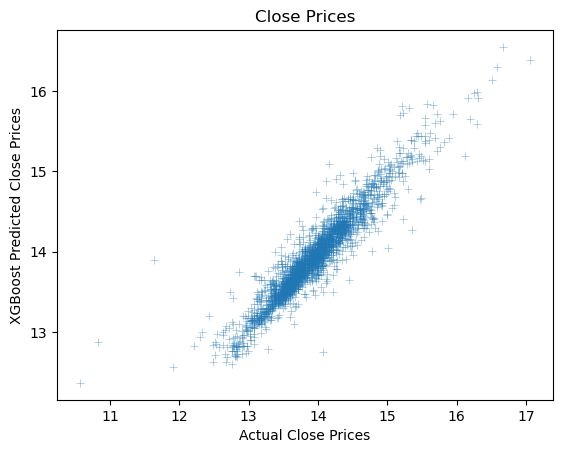

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=Y_test, y=Y_pred, marker = '+', alpha = 0.5)
plt.title("Close Prices")
plt.xlabel("Actual Close Prices")
plt.ylabel("XGBoost Predicted Close Prices")

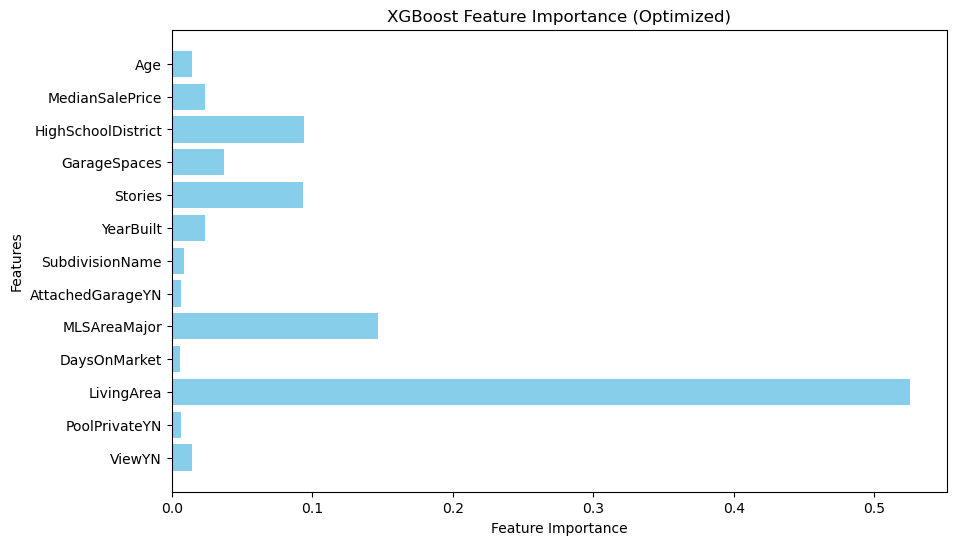

In [ ]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance (Optimized)")
plt.show()